In [ ]:
import pandas as pd
import numpy as np

In [ ]:
hd = pd.read_excel('/content/drive/MyDrive/Materiais/CentraleSupélec/ST4/EI/Données-projet-EDF_2018-2019.xls')

In [ ]:
hd.describe()

,Année,Débit mesuré maximal annuel (en m3/s),Hauteur associée mesurée (en m)
count,149.000000,149.000000,123.000000
mean,1923.000000,1335.419913,3.896748
std,43.156691,713.926746,1.272337
min,1849.000000,122.435600,1.000000
25%,1886.000000,799.918835,3.100000
50%,1923.000000,1256.402143,3.900000
75%,1960.000000,1694.929723,4.750000
max,1997.000000,3853.892756,7.200000


In [5]:
import pandas as pd
import numpy as np

## 1. EDA

(options to deal with missing data:
- 1. drop missing data;
- 2. 

In [6]:
hd = pd.read_excel('/content/drive/MyDrive/Materiais/CentraleSupélec/ST4/EI/Données-projet-EDF_2018-2019.xls')
hd.describe()

,Année,Débit mesuré maximal annuel (en m3/s),Hauteur associée mesurée (en m)
count,149.000000,149.000000,123.000000
mean,1923.000000,1335.419913,3.896748
std,43.156691,713.926746,1.272337
min,1849.000000,122.435600,1.000000
25%,1886.000000,799.918835,3.100000
50%,1923.000000,1256.402143,3.900000
75%,1960.000000,1694.929723,4.750000
max,1997.000000,3853.892756,7.200000


In [7]:
hd.isna().any()

Année                                    False
Débit mesuré maximal annuel (en m3/s)    False
Hauteur associée mesurée (en m)           True
dtype: bool

In [8]:
hd.isna().sum()

Année                                     0
Débit mesuré maximal annuel (en m3/s)     0
Hauteur associée mesurée (en m)          26
dtype: int64

In [9]:
!pip3 install openturns

     |████████████████████████████████| 48.0MB 80kB/s 


In [10]:
import openturns

In [13]:
print(fm)

In [14]:
fm.B

300.0

In [15]:
fm.model

class=SymbolicFunction name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[Q,Ks,Zv,Zm,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[Q,Ks,Zv,Zm] outputVariablesNames=[y0] formulas=[(Q/(Ks*300.*sqrt((Zm-Zv)/5000)))^(3.0/5.0)+Zv-58.5] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[Q,Ks,Zv,Zm] outputVariablesNames=[y0] formulas=[(Q/(Ks*300.*sqrt((Zm-Zv)/5000)))^(3.0/5.0)+Zv-58.5] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[Q,Ks,Zv,Zm] outputVariablesNames=[y0] formulas=[(Q/(Ks*300.*sqrt((Zm-Zv)/5000)))^(3.0/5.0)+Zv-58.5]

In [18]:
fm.distribution

class=ComposedDistribution name=ComposedDistribution dimension=4 copula=class=IndependentCopula name=IndependentCopula dimension=4 marginal[0]=class=TruncatedDistribution name=Q distribution=class=Gumbel name=Gumbel dimension=1 beta=558 gamma=1013 bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[19000.8] finite lower bound=[1] finite upper bound=[0] thresholdRealization=0.5 marginal[1]=class=TruncatedDistribution name=Ks distribution=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[30] sigma=class=Point name=Unnamed dimension=1 values=[7.5] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0] upper bound=class=Point name=Unnamed dimension=1 values=[87.3797] finite lower bound=[1] finite upper bound=[0] thresholdRealization=0.5 marginal[2]=class=Uniform name=Zv dimension=1 a=49 b=51 marginal[3]=class=Uniform name=Zm dimension=1 a=54 b=56

In [20]:
print(fm.B, fm.Q, fm.Ks, fm.L, fm.model, fm.Zm, fm.Zv)

300.0 TruncatedDistribution(Gumbel(beta = 558, gamma = 1013), bounds = [0, (19000.8) +inf[) TruncatedDistribution(Normal(mu = 30, sigma = 7.5), bounds = [0, (87.3797) +inf[) 5000.0 [Q,Ks,Zv,Zm]->[(Q/(Ks*300.*sqrt((Zm-Zv)/5000)))^(3.0/5.0)+Zv-58.5] Uniform(a = 54, b = 56) Uniform(a = 49, b = 51)


In [22]:
from openturns.viewer import View 
import openturns as ot
from math import sqrt
import pylab as pl

In [32]:
def functionFlood(X):
    Hd = 3.0
    Zb = 55.5
    L = 5.0e3
    B = 300.0
    Zd = Zb + Hd
    Q, Ks, Zv, Zm = X
    print(type(alpha))
    alpha = (Zm - Zv)/L
    H = (Q/(Ks * B * sqrt(alpha)))** (3.0/5.0) 
    Y = H + Zv
    return [Y]

input_dimension = 4
g = ot.PythonFunction(input_dimension , 1, functionFlood)

In [ ]:
Q.setDescription(["$Q (m^3/s)$"])
Ks. setDescription (["$Ks (m^{1/3})/s)$"]) Zv. setDescription (["Zv (m)"])
Zm.setDescription(["Zm (m)"])

In [41]:
from __future__ import print_function
import openturns as ot


In [43]:
# Create the marginal distributions of the parameters
dist_Q = ot.TruncatedDistribution(ot.Gumbel(558., 1013.), 0, ot.TruncatedDistribution.LOWER)
dist_Ks = ot.TruncatedDistribution(ot.Normal(30.0, 7.5), 0, ot.TruncatedDistribution.LOWER)
dist_Zv = ot.Triangular(49, 50 , 51)
dist_Zm = ot.Triangular(54, 55 , 56)
marginals = [dist_Q, dist_Ks, dist_Zv, dist_Zm]

In [44]:
# Create the Copula
RS = ot.CorrelationMatrix(4)
#RS[2, 3] = -0.2
# Evaluate the correlation matrix of the Normal copula from RS
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(RS)
# Create the Normal copula parametrized by R
copula = ot.NormalCopula(R)

In [45]:
# Create the joint probability distribution
distribution = ot.ComposedDistribution(marginals, copula)
distribution.setDescription(['Q', 'Ks', 'Zv', 'Zm'])

In [46]:
# create the model
model = ot.SymbolicFunction(['Q', 'Ks', 'Zv', 'Zm'],
                            ['(Q/(Ks*300.*sqrt((Zm-Zv)/5000)))^(3.0/5.0)+Zv-55.5-3.'])

In [47]:

# create the event we want to estimate the probability
vect = ot.RandomVector(distribution)
G = ot.CompositeRandomVector(model, vect)
event = ot.ThresholdEvent(G, ot.Greater(), 0.0)
event.setName('overflow')

In [48]:
# Define a solver
optimAlgo = ot.Cobyla()
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)


In [49]:
# Run FORM
startingPoint = distribution.getMean()
algo = ot.FORM(optimAlgo, event, startingPoint)
algo.run()
result = algo.getResult()
standardSpaceDesignPoint = result.getStandardSpaceDesignPoint()

In [50]:

# retrieve results
result = algo.getResult()
probability = result.getEventProbability()
print('Pf=', probability)

Pf= 0.0004218007300214385


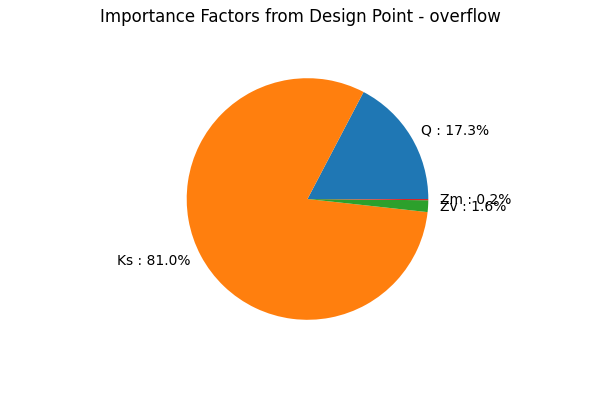

In [51]:
# Importance factors
result.drawImportanceFactors()

## Ex 1: FIRST APPROACH TO SOLVING THE USE CASE – DETERMINATION OF THE DIKE HEIGHT FROM HISTORICAL MEASUREMENTS

In [54]:
hd.columns = ['year', 'flow_Q', 'height_H']

In [55]:
hd.head()

,year,flow_Q,height_H
0,1849,3853.892756,NaN
1,1850,1256.402143,4.0
2,1851,1648.542191,4.5
3,1852,1604.857094,4.3
4,1853,341.157419,1.7


### First approach: Listwise deletion


In [58]:
hd_listwise = hd.dropna(inplace=True)
hd_listwise.head()

AttributeError: ignored

In [63]:
hd.dropna(inplace=True)

In [64]:
hd

,year,flow_Q,height_H
1,1850,1256.402143,4.0
2,1851,1648.542191,4.5
3,1852,1604.857094,4.3
4,1853,341.157419,1.7
5,1854,1148.712945,3.4
...,...,...,...
144,1993,740.178695,3.1
145,1994,3044.380648,7.2
146,1995,1127.889906,3.5
147,1996,522.151370,2.5


In [65]:
hd.isna().sum()

year        0
flow_Q      0
height_H    0
dtype: int64

In [75]:
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [70]:
hd

,year,flow_Q,height_H
1,1850,1256.402143,4.0
2,1851,1648.542191,4.5
3,1852,1604.857094,4.3
4,1853,341.157419,1.7
5,1854,1148.712945,3.4
...,...,...,...
144,1993,740.178695,3.1
145,1994,3044.380648,7.2
146,1995,1127.889906,3.5
147,1996,522.151370,2.5


In [71]:
X = hd.iloc[:, hd.columns != 'height_H']
Y = hd.iloc[:, 2] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
# train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
type(coeff_df['Coefficient'].year)

        Coefficient
year      -0.000875
flow_Q     0.001835


numpy.float64

In [80]:
# predict the output
y_pred = model.predict(X_test)

In [81]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

     Actual  Predicted
19      4.0   3.855009
66      3.9   3.879083
68      3.6   3.446447
110     5.4   5.224183
5       3.4   3.685734
47      3.5   3.609874
83      6.4   7.367595
126     4.1   4.009795
38      4.8   4.324032
76      2.5   2.651124


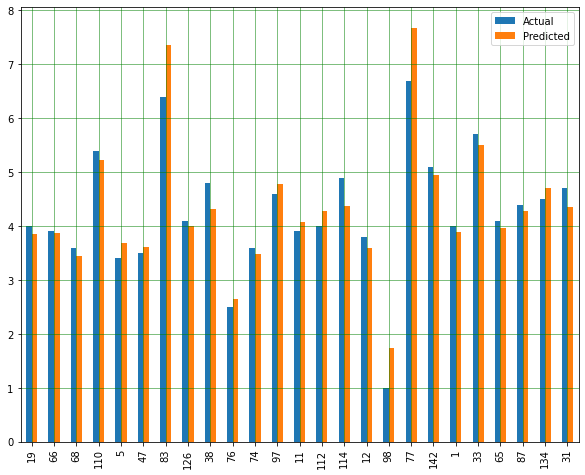

In [82]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [83]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 3.1999723995145186
Root Mean Square Error 
 0.3812561826779455
R^2 Value: 
 0.88762595490222


In [84]:
df = pd.read_excel('/content/drive/MyDrive/Materiais/CentraleSupélec/ST4/EI/Données-projet-EDF_2018-2019.xls')

In [95]:
df.columns = ['year', 'flow_Q', 'height_H']
df.head(10)

,year,flow_Q,height_H
0,1849,3853.892756,NaN
1,1850,1256.402143,4.0
2,1851,1648.542191,4.5
3,1852,1604.857094,4.3
4,1853,341.157419,1.7
5,1854,1148.712945,3.4
6,1855,868.271497,3.4
7,1856,1147.880794,4.1
8,1857,1227.466678,4.1
9,1858,1990.668281,5.3


In [99]:
df['height_H'].interpolate(method='linear', inplace=True, limit_direction="both")